## Pandas Series

In [1]:
import pandas as pd

In [4]:
obj = pd.Series([4, 7, -5, 3])
print(obj)
print(obj.values, type(obj.values), '\n')
print(obj.index, type(obj.index), '\n')
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
print(obj)
print(obj[['Bob', 'Ryan']]) # 안에 리스트로 넣어주면 여러개의 값을 가져올 수 있음

0    4
1    7
2   -5
3    3
dtype: int64
[ 4  7 -5  3] <class 'numpy.ndarray'> 

RangeIndex(start=0, stop=4, step=1) <class 'pandas.core.indexes.range.RangeIndex'> 

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64
Bob     4
Ryan    3
dtype: int64


## Pandas DataFrame

In [19]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
print(frame)
frame.index = ['Bob', 'Steve', 'Jeff', 'Ryan', 'Jack', 'Tom']
frame['person'] = obj # Series의 index에 맞춰서 DataFrame의 index에 맞는 값만 들어감
print(frame)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2
        state  year  pop                                             person
Bob      Ohio  2000  1.5  \n{"name": "Wes",\n "places_lived": ["United S...
Steve    Ohio  2001  1.7  \n{"name": "Wes",\n "places_lived": ["United S...
Jeff     Ohio  2002  3.6  \n{"name": "Wes",\n "places_lived": ["United S...
Ryan   Nevada  2001  2.4  \n{"name": "Wes",\n "places_lived": ["United S...
Jack   Nevada  2002  2.9  \n{"name": "Wes",\n "places_lived": ["United S...
Tom    Nevada  2003  3.2  \n{"name": "Wes",\n "places_lived": ["United S...


### Data loading, storage, and file format
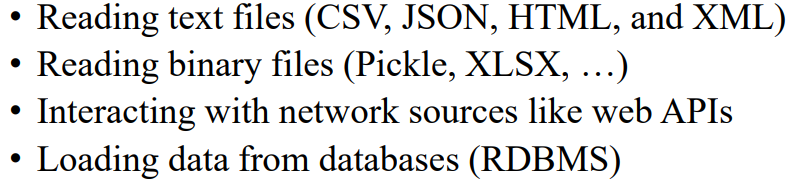

In [13]:
# csv는 콤마로 구분된 파일
loading = pd.read_csv('csvexe.txt', sep=',', header=None, names=['key1','key2','value1','value2'], index_col=['key1','key2'])
# header=None은 파일에 헤더가 없다는 것을 알려줌
# names는 헤더를 지정해줌
# index_col은 특정 열을 인덱스로 지정해줌
print(loading)
loading.to_csv('csvexe2.txt', sep='|') # csv파일로 저장할 때 구분자를 지정해줄 수 있음

           value1  value2
key1 key2                
one  a          1       2
     b          3       4
two  a          9      10
     b         11      12


In [12]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
import json
result = json.loads(obj) # json을 파이썬 객체로 변환
print(result)
asjson = json.dumps(result['siblings']) # 파이썬 객체를 json으로 변환

{'name': 'Wes', 'places_lived': ['United States', 'Spain', 'Germany'], 'pet': None, 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']}, {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}


In [18]:
data = pd.read_json(asjson) # json파일을 DataFrame으로 변환
data.index = data['name'] # index를 name으로 지정
data.drop('name', axis=1, inplace=True) # name 열을 삭제
data

,age,pets
name,,
Scott,30,"[Zeus, Zuko]"
Katie,38,"[Sixes, Stache, Cisco]"


In [ ]:
tables = pd.read_html('document.html') # html파일을 DataFrame으로 변환
print(len(tables)) # 테이블의 개수
print(tables[0]) # 첫번째 테이블을 출력

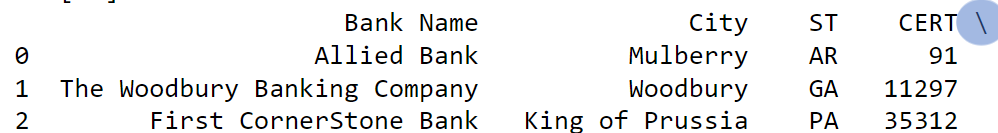

XML도 HTML과 형태가 비슷

In [24]:
from lxml import objectify
path = 'Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()
print(root.INDICATOR_SEQ) # root의 INDICATOR_SEQ 태그를 출력


373889


Python support various binary data formats, including pickle, HDF2, 
and Excel (xlsx)

In [38]:
loading.to_pickle('document')
pd.read_pickle('document')

value1  value2
key1 key2                
one  a          1       2
     b          3       4
two  a          9      10
     b         11      12

In [ ]:
writer = pd.ExcelWriter('document.xlsx')
loading.to_excel(writer,'Sheet1')
pd.read_excel('document.xlsx', 'Sheet1')

In [48]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url) # url에 요청을 보냄
data = resp.json() # json으로 변환 (리스트 안에 딕셔너리가 들어있는 형태)
print(data[0])
issues = pd.DataFrame(data, columns=['number', 'title', 'state'])
print(issues.head(5)) # 상위 5개만 출력

{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58245', 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas', 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58245/labels{/name}', 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58245/comments', 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58245/events', 'html_url': 'https://github.com/pandas-dev/pandas/pull/58245', 'id': 2241145038, 'node_id': 'PR_kwDOAA0YD85si7zW', 'number': 58245, 'title': 'DOC: Add documentation on parquet categorical data handling', 'user': {'login': 'abeltavares', 'id': 121238257, 'node_id': 'U_kgDOBzny8Q', 'avatar_url': 'https://avatars.githubusercontent.com/u/121238257?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/abeltavares', 'html_url': 'https://github.com/abeltavares', 'followers_url': 'https://api.github.com/users/abeltavares/followers', 'following_url': 'https://api.github.com/users/abeltavares/